#### Patrick Brockmann
LSCE - September 2024

- Explore linear interpolation https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import matplotlib.ticker as ticker
import pandas as pd

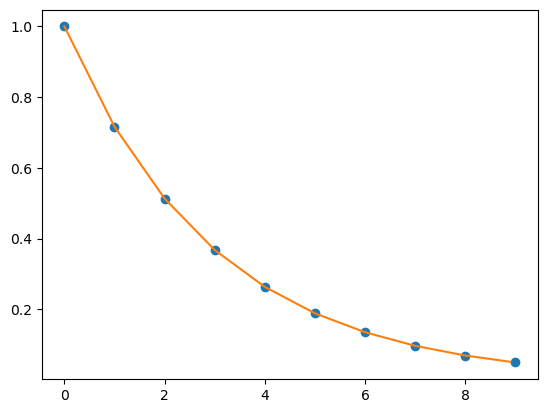

In [3]:
x = np.arange(0, 10)
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y, fill_value="extrapolate")

xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`

plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

In [4]:
f(10)

array(0.03009069)

In [5]:
def readData(file, x1Name, y1Name, x2Name, y2Name):
    global x1, y1, x2, y2

    try:
        df = pd.read_csv(file)
        print(df.columns)

        x1 = df[x1Name].to_numpy()
        y1 = df[y1Name].to_numpy()
        x2 = df[x2Name].to_numpy()
        y2 = df[y2Name].to_numpy()

    except:
        print("Error: reading data file")

In [6]:
x1Name ='Time (ka)'
y1Name = 'Stack Benthic d18O (per mil)'
x2Name = 'depthODP849cm'
y2Name = 'd18Oforams-b'

readData('testFile.csv', x1Name, y1Name, x2Name, y2Name)

Index(['Time (ka)', 'Stack Benthic d18O (per mil)', 'Standard error (per mil)',
       'depthODP849cm', 'd18Oforams-b', 'd13Cforams-b', 'depthODP846',
       'd18Oforams-b.1', 'd13Cforams-b.1', 'depth', '18MD00-2374vsPDB',
       '13MD00-2374vsPDB', 'depth.1', '18MD00-2374vsPDB-pl',
       '13MD00-2374vsPDB-pl'],
      dtype='object')


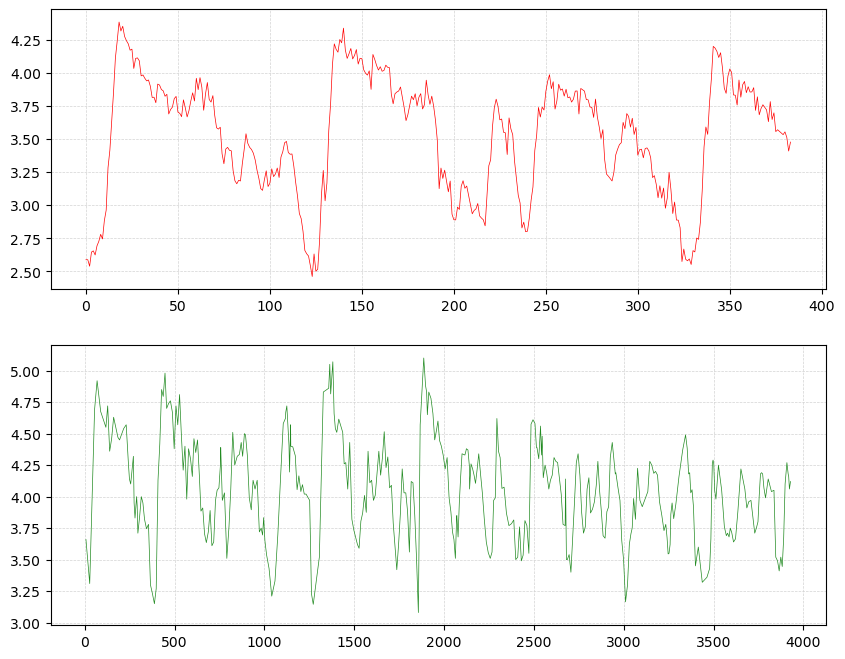

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(10,8), num='Lineage')

axs[0].plot(x1, y1, c='red', lw=0.5)
axs[0].grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)

axs[1].plot(x2, y2, c='forestgreen', lw=0.5)
axs[1].grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)

plt.show()

In [8]:
df = pd.read_csv('pointers2.csv', names=['coordsX1','coordsX2'])

print(df)

coordsX1 = df['coordsX1']
coordsX2 = df['coordsX2']

f_1to2 = interpolate.interp1d(coordsX1, coordsX2, fill_value="extrapolate")
f_2to1 = interpolate.interp1d(coordsX2, coordsX1, fill_value="extrapolate")

      coordsX1     coordsX2
0    13.181947    42.189609
1    70.394752   241.184634
2   131.600145   406.630579
3   191.157883   641.524782
4   209.053322   704.746443
5   218.637378   725.974319
6   234.572908   783.699038
7   243.595839   811.653170
8   281.926131   912.560277
9   287.661213   930.637025
10  322.817641  1024.202843
11  335.659767  1082.863678
12  381.557270  1253.371388


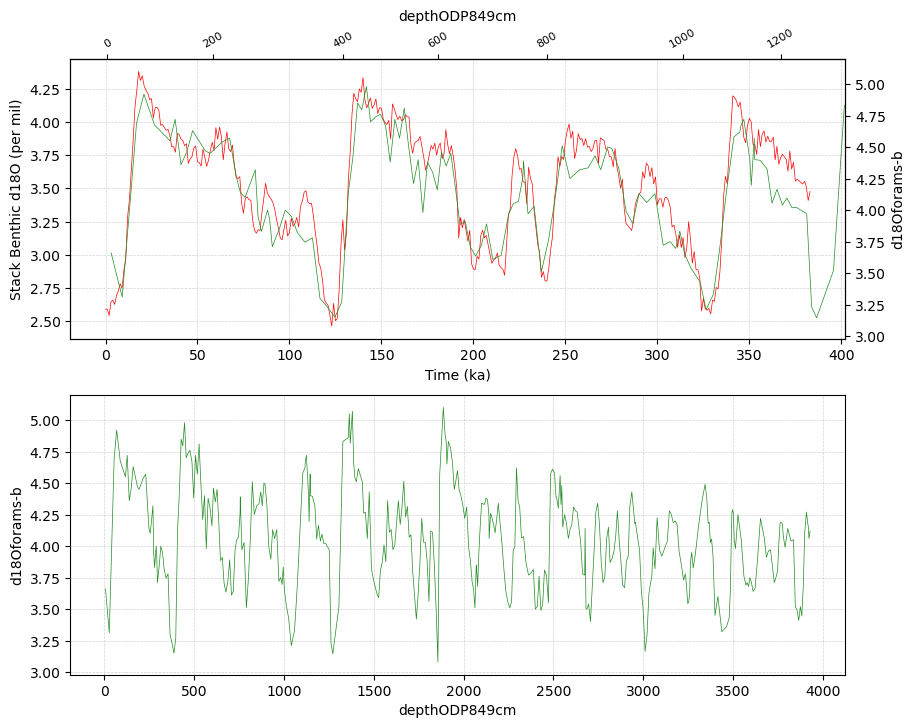

In [194]:
fig, axs = plt.subplots(2, 1, figsize=(10,8), num='Lineage')

axs[0].plot(x1, y1, c='red', lw=0.5)
axs[0].grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)
axs[0].set_xlabel(x1Name)
axs[0].set_ylabel(y1Name)
xlim = axs[0].get_xlim()

axs[1].plot(x2, y2, c='forestgreen', lw=0.5)
axs[1].grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)
axs[1].set_xlabel(x2Name)
axs[1].set_ylabel(y2Name)

axsInterp = axs[0].twinx()
axsInterp.set_ylabel(y2Name)
axsInterp.plot(f_2to1(x2), y2, c='forestgreen', lw=0.5)
second_xaxis = axsInterp.secondary_xaxis('top', functions=(f_1to2, f_2to1))
second_xaxis.tick_params(labelrotation=30, labelsize=8)
second_xaxis.set_xlabel(x2Name)
axsInterp.set_xlim(xlim)

plt.show()